In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!ls /content/gdrive/My\ Drive/eva-04/S10/* 

We'll need to update our path to import from Drive.

In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/eva-04/S10/')

Now we can import the library and use the function.

In [4]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from albumentations import Compose, RandomCrop, Normalize, HorizontalFlip, Resize
from albumentations.pytorch import ToTensor
from models import Resnet18 as resnet18
from transformations import CIFARModel10_Alb as cifar

import importlib
importlib.reload(resnet18)
importlib.reload(cifar)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = resnet18.ResNet18().to(device)

SEED = 1
# CUDA?
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
#dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if use_cuda else dict(shuffle=True, batch_size=64)

# train dataloader
#train_loader = torch.utils.data.DataLoader(g_train, **dataloader_args)

# test dataloader
#test_loader = torch.utils.data.DataLoader(g_test, **dataloader_args)
#import images as im
#import random
#X,Y,names = im.get_data('cifar-10-batches-py/data_batch_1')
import numpy as np
import matplotlib.pyplot as plt
import os
#importlib.reload(im)
#for x in range(100):
#  im.visualize_image(X,Y,names,random.randint(1,10000),'/content/gdrive/My Drive/eva-04/S9/images')


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
cuda
CUDA Available? True


SHOW PARAMETERS

In [5]:
from utils.global_fun import test_model
from utils.global_fun import train_model
from utils.global_fun import show_summary, run_model_with_entropy,  draw_accuracy_loss_change_graps

import utils.global_fun as fun
from models import Resnet18 as resnet18
from transformations import CIFARModel10_Alb as cifar

import importlib
importlib.reload(resnet18)
importlib.reload(cifar)
importlib.reload(fun)



cifar_model = cifar.CIFARModel10_Alb(model,)
show_summary(cifar_model,input_size=(3,32,32))


Files already downloaded and verified
Files already downloaded and verified
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13       

RUNNING WITH REGULARIZATION

In [6]:
run_model_with_entropy(cifar_model, device, doL1= 1, doL2=1, LAMBDA=0.0004, EPOCHS=50)

  0%|          | 0/196 [00:00<?, ?it/s]

EPOCH: 0
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 0


Loss=47.447784423828125 Batch_id=195 Accuracy=33.25: 100%|██████████| 196/196 [00:52<00:00,  3.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 4539/10000 (45.39%)

loss val = 0.005969872784614563
EPOCH: 1
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 1


Loss=47.34275436401367 Batch_id=195 Accuracy=44.47: 100%|██████████| 196/196 [00:52<00:00,  3.71it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 5169/10000 (51.69%)

loss val = 0.005330892980098725
EPOCH: 2
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 2


Loss=46.713096618652344 Batch_id=195 Accuracy=49.48: 100%|██████████| 196/196 [00:52<00:00,  3.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 5472/10000 (54.72%)

loss val = 0.005136547458171844
EPOCH: 3
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 3


Loss=46.173866271972656 Batch_id=195 Accuracy=53.41: 100%|██████████| 196/196 [00:52<00:00,  3.71it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 6149/10000 (61.49%)

loss val = 0.004315635979175568
EPOCH: 4
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 4


Loss=45.98796844482422 Batch_id=195 Accuracy=56.80: 100%|██████████| 196/196 [00:52<00:00,  3.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 6607/10000 (66.07%)

loss val = 0.003820324486494064
EPOCH: 5
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 5


Loss=45.81838607788086 Batch_id=195 Accuracy=59.52: 100%|██████████| 196/196 [00:52<00:00,  3.73it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 6616/10000 (66.16%)

loss val = 0.003902511489391327
EPOCH: 6
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 6


Loss=45.4508171081543 Batch_id=195 Accuracy=61.87: 100%|██████████| 196/196 [00:52<00:00,  3.71it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6839/10000 (68.39%)

loss val = 0.0036418319702148437
EPOCH: 7
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 7


Loss=44.795101165771484 Batch_id=195 Accuracy=63.46: 100%|██████████| 196/196 [00:52<00:00,  3.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 6965/10000 (69.65%)

loss val = 0.003463752943277359
EPOCH: 8
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 8


Loss=44.5776252746582 Batch_id=195 Accuracy=64.90: 100%|██████████| 196/196 [00:52<00:00,  3.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 7102/10000 (71.02%)

loss val = 0.003280561923980713
EPOCH: 9
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 9


Loss=44.305599212646484 Batch_id=195 Accuracy=66.34: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7195/10000 (71.95%)

loss val = 0.0032164092004299165
EPOCH: 10
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 10


Loss=44.02223205566406 Batch_id=195 Accuracy=67.67: 100%|██████████| 196/196 [00:52<00:00,  3.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7463/10000 (74.63%)

loss val = 0.0029314651072025297
EPOCH: 11
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 11


Loss=43.52474594116211 Batch_id=195 Accuracy=68.98: 100%|██████████| 196/196 [00:52<00:00,  3.71it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7523/10000 (75.23%)

loss val = 0.002825536835193634
EPOCH: 12
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 12


Loss=43.29701232910156 Batch_id=195 Accuracy=70.02: 100%|██████████| 196/196 [00:52<00:00,  3.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7658/10000 (76.58%)

loss val = 0.0027153913378715516
EPOCH: 13
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 13


Loss=43.31022644042969 Batch_id=195 Accuracy=70.91: 100%|██████████| 196/196 [00:52<00:00,  3.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7658/10000 (76.58%)

loss val = 0.0027078563809394838
EPOCH: 14
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 14


Loss=42.9312629699707 Batch_id=195 Accuracy=71.53: 100%|██████████| 196/196 [00:52<00:00,  3.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7290/10000 (72.90%)

loss val = 0.003207120579481125
EPOCH: 15
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 15


Loss=42.66512680053711 Batch_id=195 Accuracy=72.47: 100%|██████████| 196/196 [00:52<00:00,  3.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7451/10000 (74.51%)

loss val = 0.0030179556012153623
EPOCH: 16
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 16


Loss=42.142364501953125 Batch_id=195 Accuracy=73.00: 100%|██████████| 196/196 [00:52<00:00,  3.71it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7874/10000 (78.74%)

loss val = 0.002417104661464691
EPOCH: 17
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 17


Loss=41.89329147338867 Batch_id=195 Accuracy=73.98: 100%|██████████| 196/196 [00:52<00:00,  3.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7813/10000 (78.13%)

loss val = 0.002658623248338699
EPOCH: 18
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 18


Loss=41.71186828613281 Batch_id=195 Accuracy=74.19: 100%|██████████| 196/196 [00:52<00:00,  3.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7762/10000 (77.62%)

loss val = 0.002549541300535202
EPOCH: 19
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 19


Loss=41.360408782958984 Batch_id=195 Accuracy=74.81: 100%|██████████| 196/196 [00:52<00:00,  3.71it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7936/10000 (79.36%)

loss val = 0.002404936000704765
EPOCH: 20
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 20


Loss=41.17510986328125 Batch_id=195 Accuracy=75.63: 100%|██████████| 196/196 [00:52<00:00,  3.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7761/10000 (77.61%)

loss val = 0.002679677700996399
EPOCH: 21
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 21


Loss=40.963314056396484 Batch_id=195 Accuracy=76.18: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7969/10000 (79.69%)

loss val = 0.002407131737470627
EPOCH: 22
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 22


Loss=40.75617980957031 Batch_id=195 Accuracy=76.94: 100%|██████████| 196/196 [00:52<00:00,  3.71it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8132/10000 (81.32%)

loss val = 0.0021834748089313506
EPOCH: 23
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 23


Loss=40.78767776489258 Batch_id=195 Accuracy=77.16: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8280/10000 (82.80%)

loss val = 0.0020269795417785647
EPOCH: 24
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 24


Loss=40.14163589477539 Batch_id=195 Accuracy=76.98: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8173/10000 (81.73%)

loss val = 0.002152614498138428
EPOCH: 25
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 25


Loss=40.07117462158203 Batch_id=195 Accuracy=78.44: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7939/10000 (79.39%)

loss val = 0.0024451971381902696
EPOCH: 26
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 26


Loss=39.79027557373047 Batch_id=195 Accuracy=78.38: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8153/10000 (81.53%)

loss val = 0.0022434240132570265
EPOCH: 27
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 27


Loss=39.698673248291016 Batch_id=195 Accuracy=81.37: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8632/10000 (86.32%)

loss val = 0.001574726802110672
EPOCH: 28
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 28


Loss=39.663909912109375 Batch_id=195 Accuracy=82.52: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 8672/10000 (86.72%)

loss val = 0.0015232660800218582
EPOCH: 29
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 29


Loss=39.62355041503906 Batch_id=195 Accuracy=82.93: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 8718/10000 (87.18%)

loss val = 0.0014942871153354644
EPOCH: 30
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 30


Loss=39.61936569213867 Batch_id=195 Accuracy=83.14: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 8705/10000 (87.05%)

loss val = 0.0014991463899612426
EPOCH: 31
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 31


Loss=39.437068939208984 Batch_id=195 Accuracy=83.50: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 8736/10000 (87.36%)

loss val = 0.0014731338143348695
EPOCH: 32
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 32


Loss=39.33655548095703 Batch_id=195 Accuracy=83.76: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 8697/10000 (86.97%)

loss val = 0.0014930875211954116
EPOCH: 33
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 33


Loss=39.416542053222656 Batch_id=195 Accuracy=83.80: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 8736/10000 (87.36%)

loss val = 0.0014768840789794921
EPOCH: 34
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 34


Loss=39.3713493347168 Batch_id=195 Accuracy=84.14: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 8763/10000 (87.63%)

loss val = 0.001454966638982296
EPOCH: 35
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 35


Loss=39.46604537963867 Batch_id=195 Accuracy=84.00: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 8759/10000 (87.59%)

loss val = 0.0014516504183411597
EPOCH: 36
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 36


Loss=39.26178741455078 Batch_id=195 Accuracy=84.28: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 8754/10000 (87.54%)

loss val = 0.0014456661120057107
EPOCH: 37
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 37


Loss=39.22354507446289 Batch_id=195 Accuracy=84.29: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 8781/10000 (87.81%)

loss val = 0.0014366460740566254
EPOCH: 38
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 38


Loss=39.1596794128418 Batch_id=195 Accuracy=84.32: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 8781/10000 (87.81%)

loss val = 0.0014434491589665414
EPOCH: 39
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 39


Loss=39.06137466430664 Batch_id=195 Accuracy=84.78: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 8776/10000 (87.76%)

loss val = 0.0014337434455752372
EPOCH: 40
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 40


Loss=39.315242767333984 Batch_id=195 Accuracy=84.44: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 8782/10000 (87.82%)

loss val = 0.0014336634680628777
EPOCH: 41
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 41


Loss=39.16755676269531 Batch_id=195 Accuracy=84.69: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 8796/10000 (87.96%)

loss val = 0.0014084974974393845
EPOCH: 42
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 42


Loss=38.982078552246094 Batch_id=195 Accuracy=84.93: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 8763/10000 (87.63%)

loss val = 0.0014588397830724716
EPOCH: 43
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 43


Loss=39.13261413574219 Batch_id=195 Accuracy=84.91: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 8785/10000 (87.85%)

loss val = 0.0014251882180571556
EPOCH: 44
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 44


Loss=38.86226272583008 Batch_id=195 Accuracy=85.00: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 8762/10000 (87.62%)

loss val = 0.0014378896653652192
EPOCH: 45
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 45


Loss=38.975555419921875 Batch_id=195 Accuracy=85.32: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 8834/10000 (88.34%)

loss val = 0.0013906013190746306
EPOCH: 46
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 46


Loss=38.93647003173828 Batch_id=195 Accuracy=85.42: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 8822/10000 (88.22%)

loss val = 0.0013887521058320999
EPOCH: 47
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 47


Loss=38.94636535644531 Batch_id=195 Accuracy=85.50: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 8831/10000 (88.31%)

loss val = 0.001384717757999897
EPOCH: 48
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 48


Loss=38.87692642211914 Batch_id=195 Accuracy=85.85: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 8834/10000 (88.34%)

loss val = 0.0013827821731567382
EPOCH: 49
L1= 1 ;L2= 1 ;LAMBDA= 0.0004 epoch= 49


Loss=38.787689208984375 Batch_id=195 Accuracy=85.50: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]



Test set: Average loss: 0.0014, Accuracy: 8827/10000 (88.27%)

loss val = 0.0013800959765911103


LOSS, ACCURACY GRAPHS

SAVE MODEL

In [0]:
state = {
    'epoch': 130,
    'state_dict': cifar_model.m_model.state_dict(),
    'optimizer': cifar_model.m_optimizer.state_dict()
}

filepath = "/content/gdrive/My Drive/eva-04/S10/saved_model"

torch.save(cifar_model.m_model.state_dict(), open(os.path.join(filepath, 'model.pt'), 'wb'))
torch.save(cifar_model.m_optimizer.state_dict(), open(os.path.join(filepath, 'optimizer.pt'), 'wb'))
torch.save(state, open(os.path.join(filepath, 'savedmodel'), 'wb'))

#model.load_state_dict(state['state_dict'])
#optimizer.load_state_dict(state['optimizer'])
#model = torch.load(filepath)


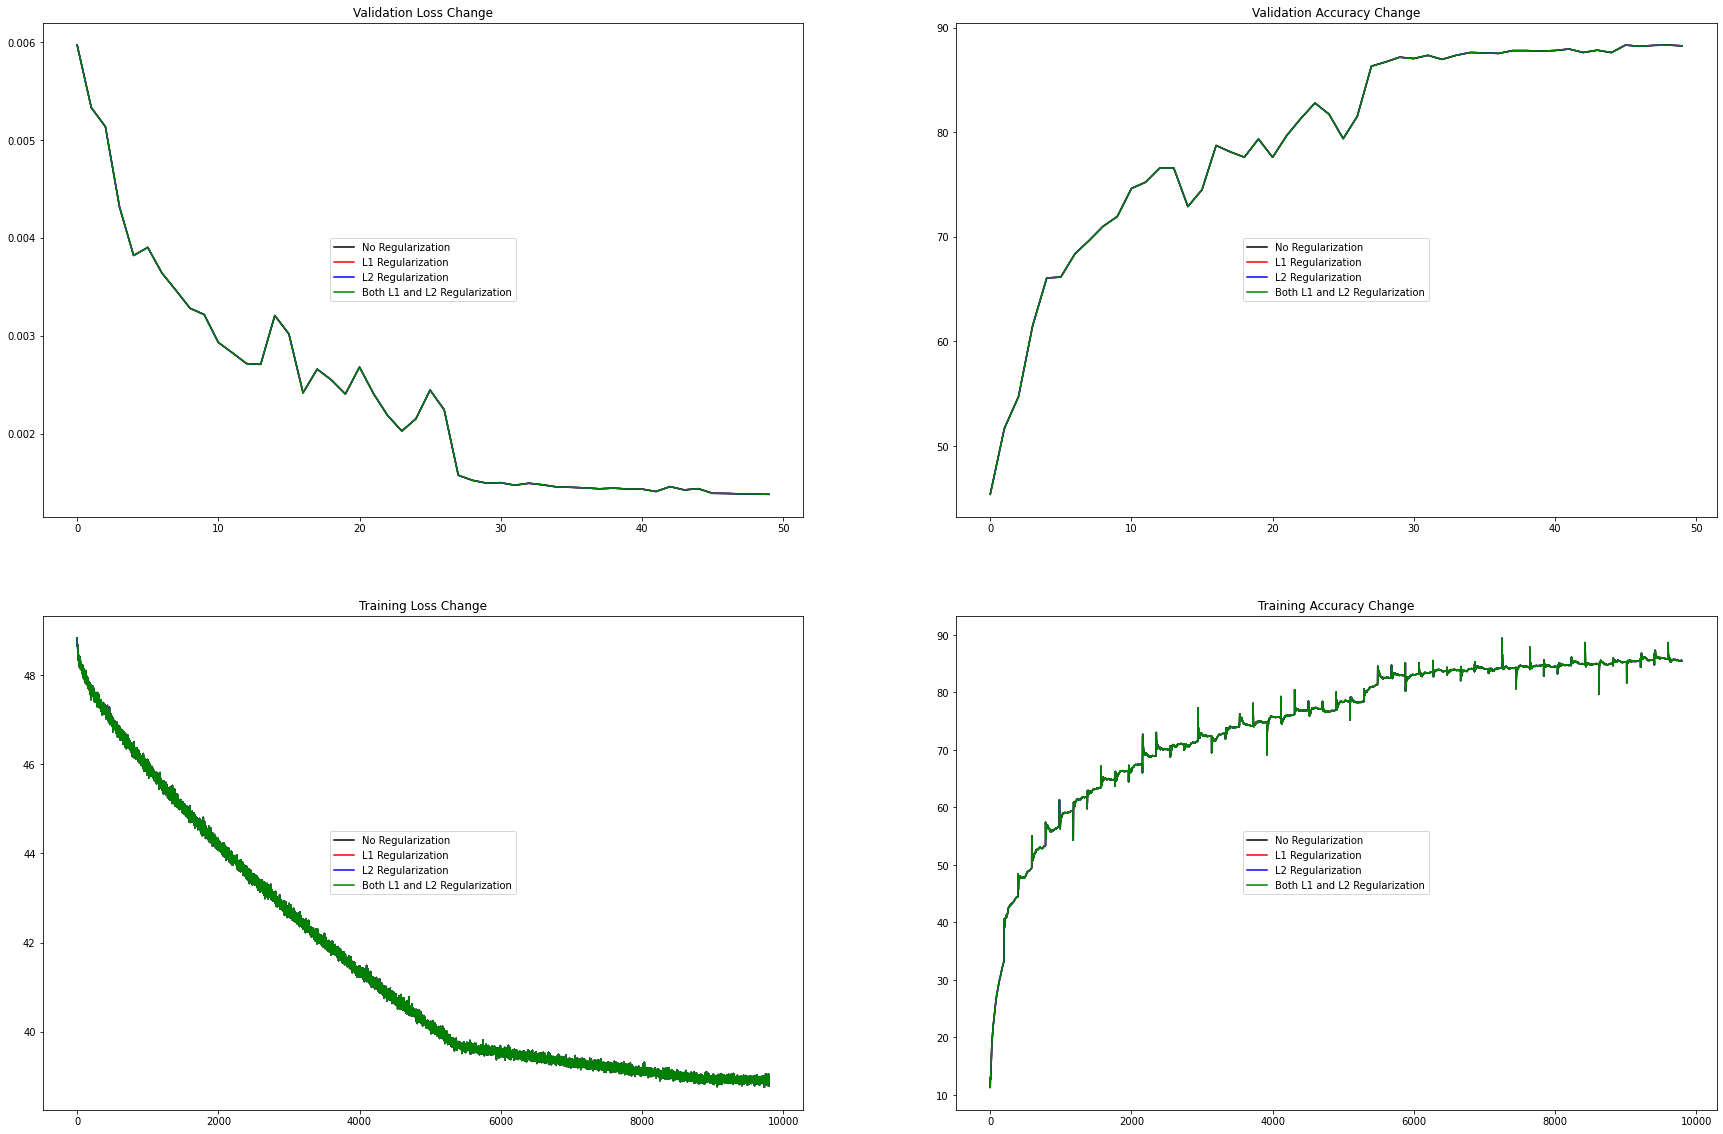

In [8]:
draw_accuracy_loss_change_graps(cifar_model,cifar_model,cifar_model,cifar_model)

LR FINDER

Increases the learning rate in an exponential manner and computes the training loss for each learning rate. lr_finder.plot() plots the training loss versus logarithmic learning rate.

In [9]:
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from lr_finder import LRFinder as lrfinder

model = resnet18.ResNet18().to(device)
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(cifar_model.m_model.parameters(), lr=1e-7, weight_decay=1e-2)
lr_finder = lrfinder.LRFinder(cifar_model.m_model, optimizer, criterion, device="cuda")
lr_finder.range_test(cifar_model.m_train_loader, end_lr=100, num_iter=100, step_mode="exp")
#model = rc10.resnet56()
#lr_finder = LRFinder(model,cifar_model.m_optimizer,cifar_model.m_criterion, device)
#lr_finder.range_test(cifar_model.m_trainloader, end_lr=100, num_iter=100, step_mode="exp")

  pip install torch-lr-finder -v --global-option="amp"


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


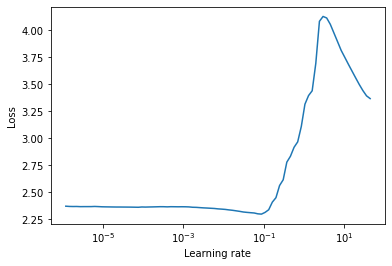

Validation Loss

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


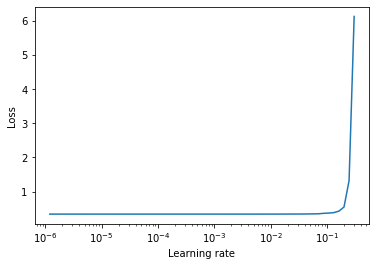

In [10]:
lr_finder.reset()
lr_finder.range_test(cifar_model.m_train_loader, val_loader=cifar_model.m_test_loader, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot(skip_end=0)

GRADCAM VISUALIZATION

ERROR! Session/line number was not unique in database. History logging moved to new session 62
GradCAM Mode:
incorrect samples collected for gradcam= 30


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


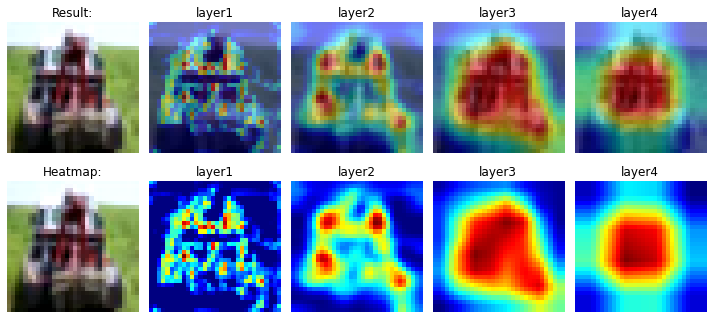

<Figure size 432x288 with 0 Axes>

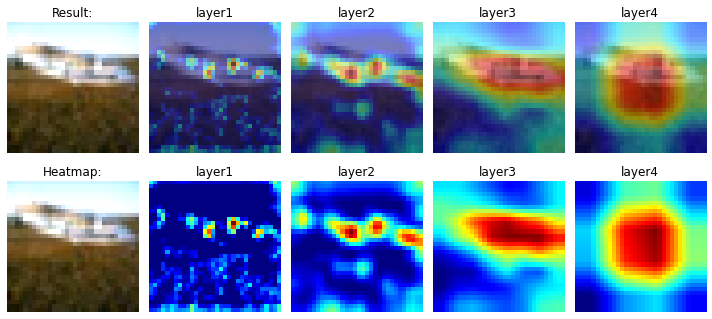

<Figure size 432x288 with 0 Axes>

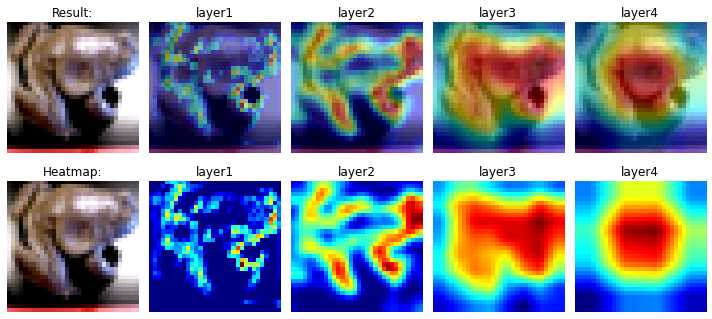

<Figure size 432x288 with 0 Axes>

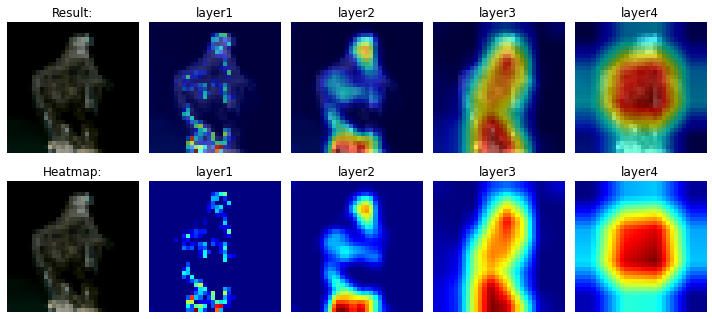

<Figure size 432x288 with 0 Axes>

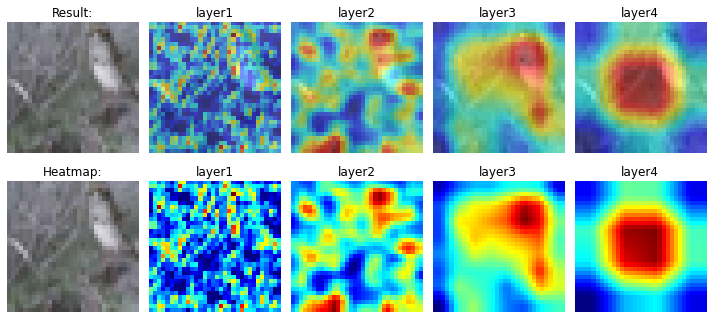

<Figure size 432x288 with 0 Axes>

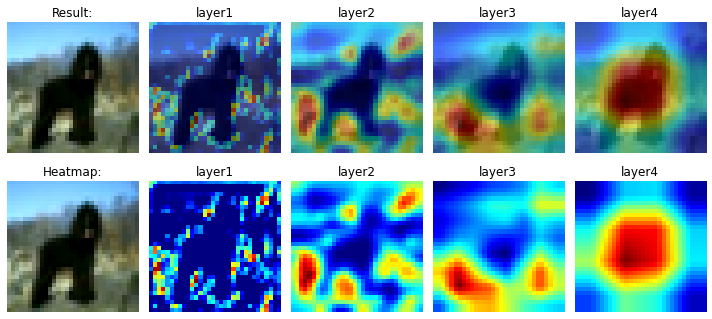

<Figure size 432x288 with 0 Axes>

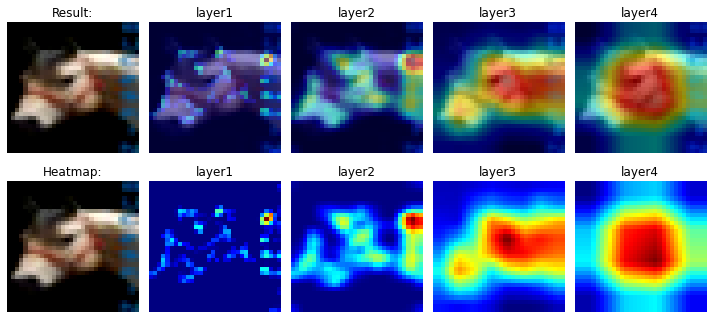

<Figure size 432x288 with 0 Axes>

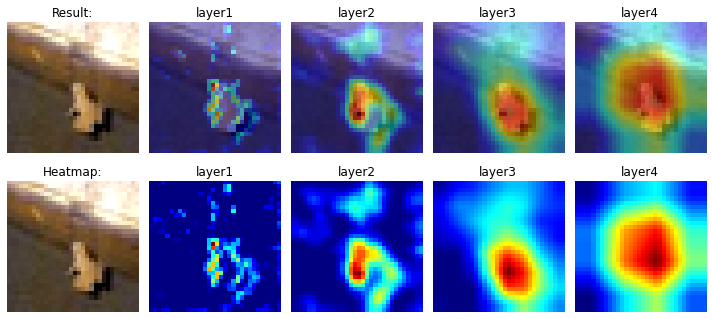

<Figure size 432x288 with 0 Axes>

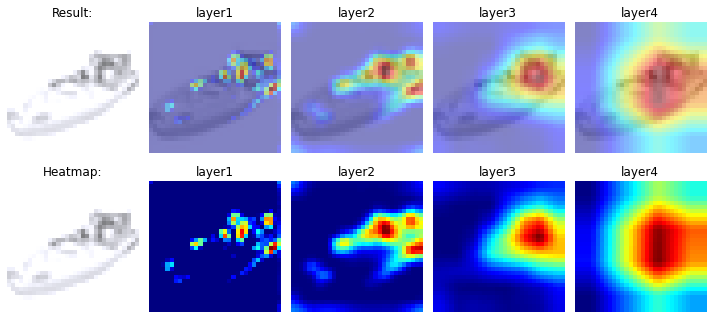

<Figure size 432x288 with 0 Axes>

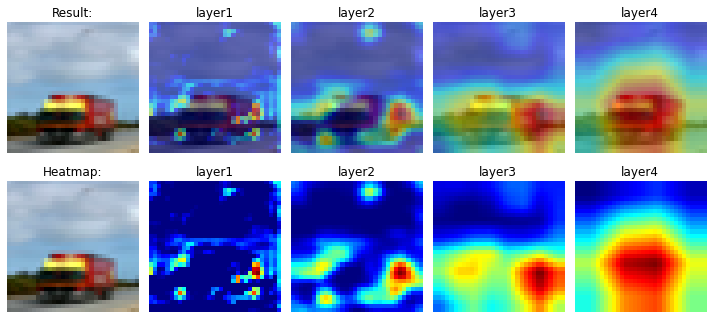

<Figure size 432x288 with 0 Axes>

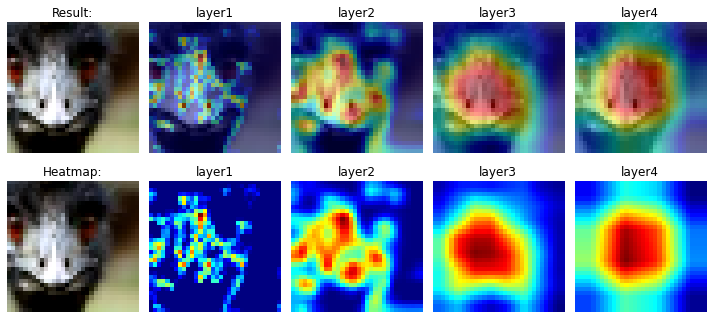

<Figure size 432x288 with 0 Axes>

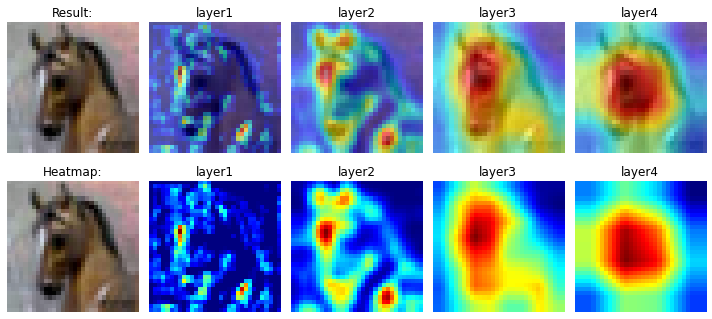

<Figure size 432x288 with 0 Axes>

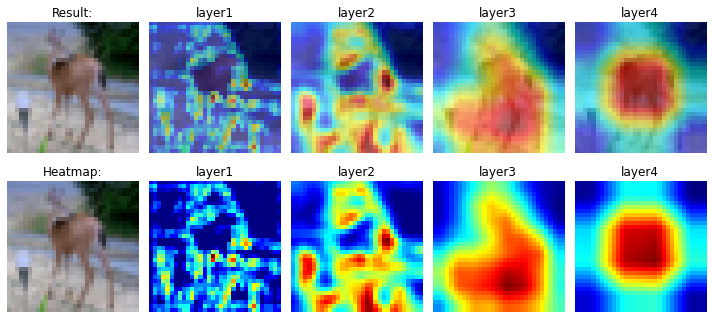

<Figure size 432x288 with 0 Axes>

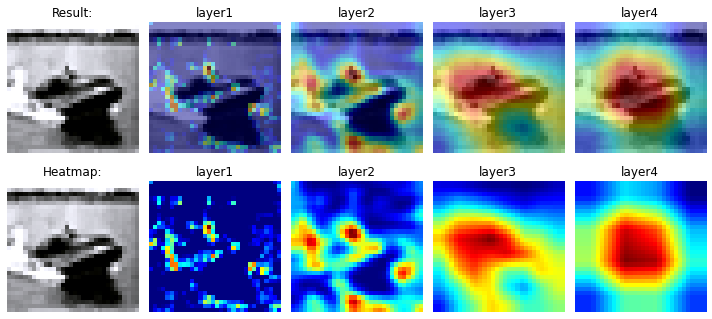

<Figure size 432x288 with 0 Axes>

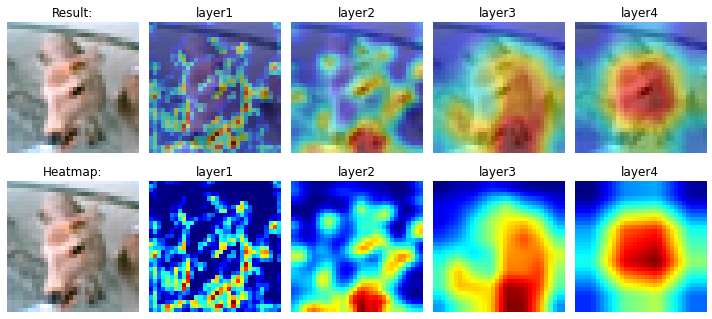

<Figure size 432x288 with 0 Axes>

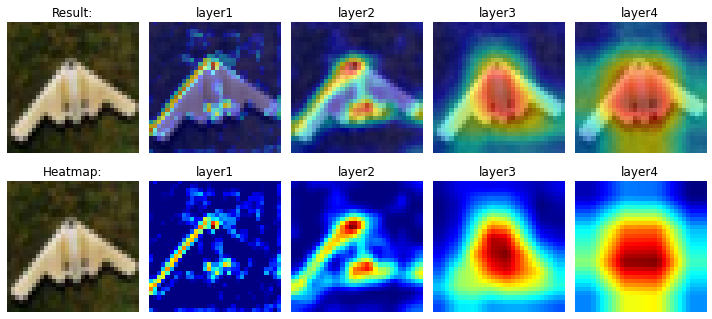

<Figure size 432x288 with 0 Axes>

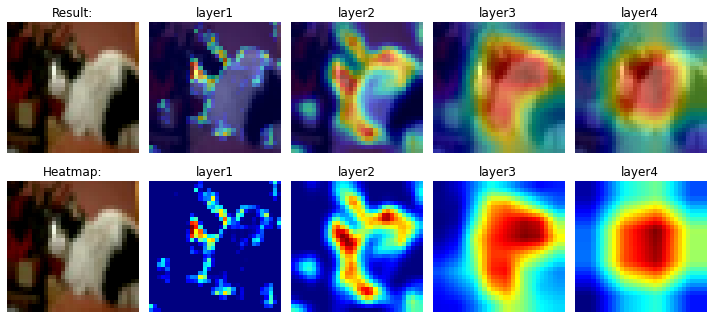

<Figure size 432x288 with 0 Axes>

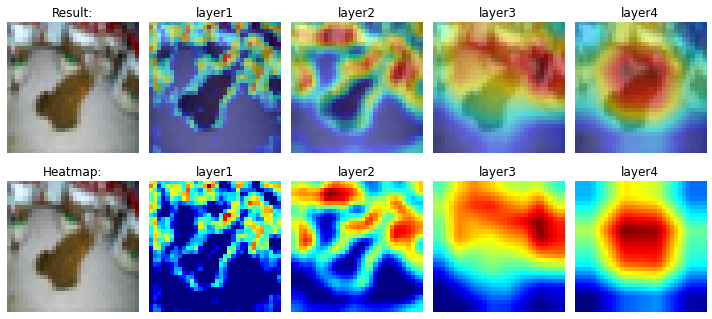

<Figure size 432x288 with 0 Axes>

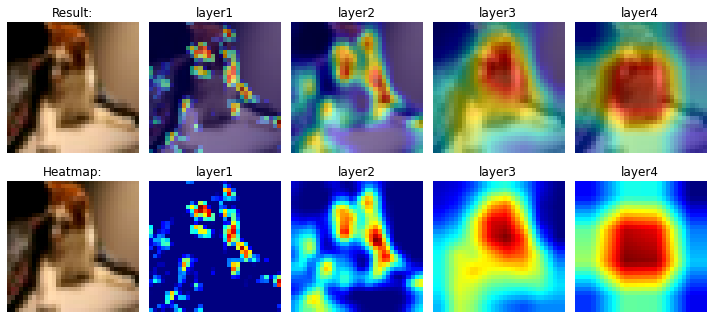

<Figure size 432x288 with 0 Axes>

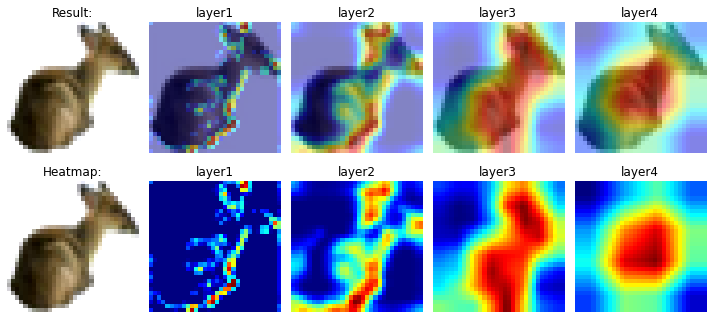

<Figure size 432x288 with 0 Axes>

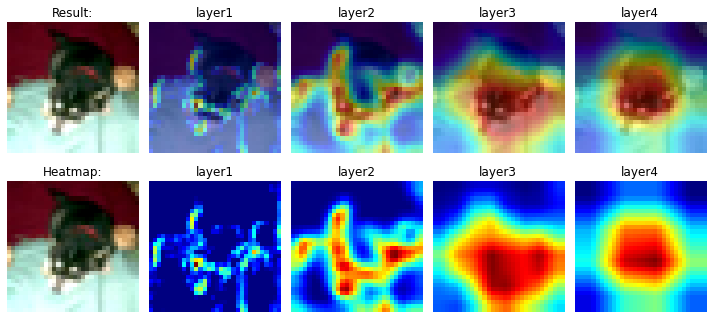

<Figure size 432x288 with 0 Axes>

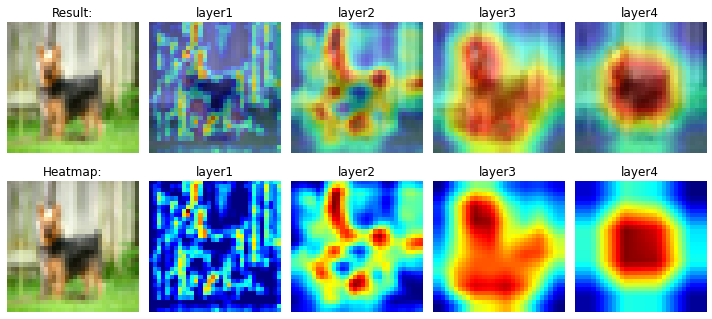

<Figure size 432x288 with 0 Axes>

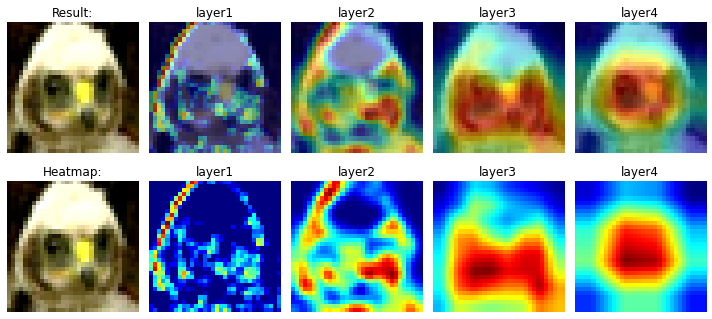

<Figure size 432x288 with 0 Axes>

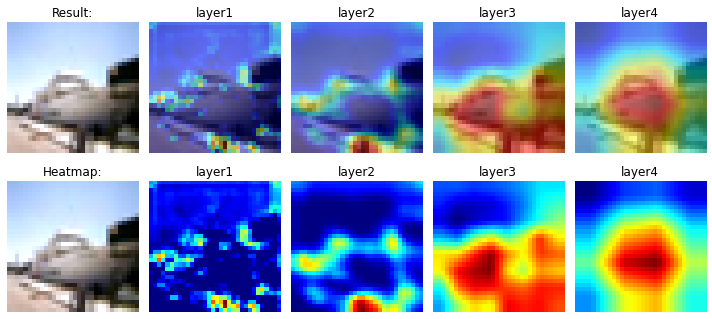

<Figure size 432x288 with 0 Axes>

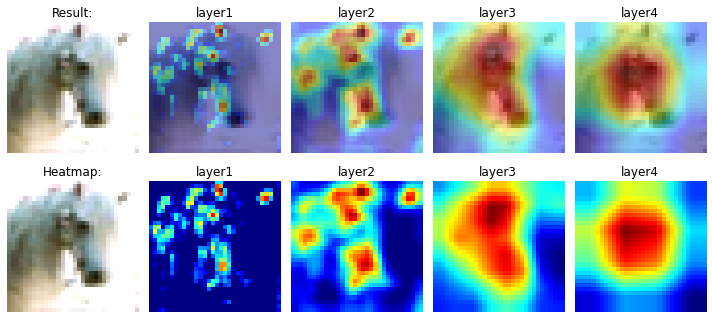

<Figure size 432x288 with 0 Axes>

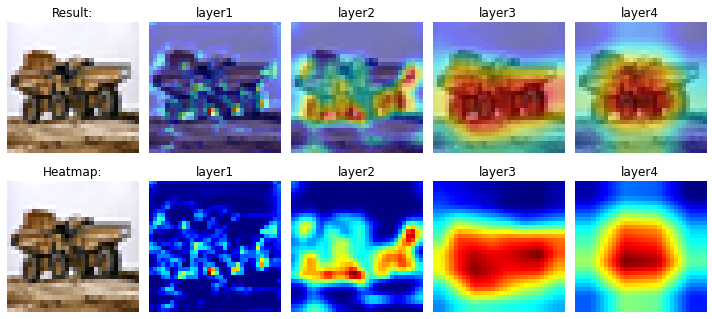

<Figure size 432x288 with 0 Axes>

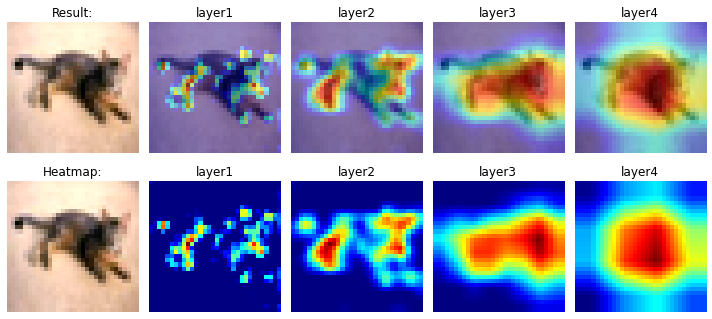

<Figure size 432x288 with 0 Axes>

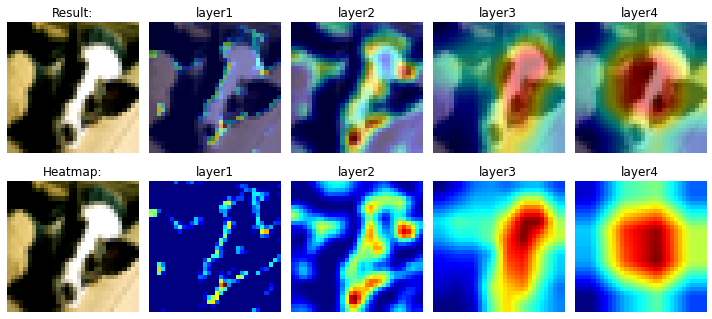

<Figure size 432x288 with 0 Axes>

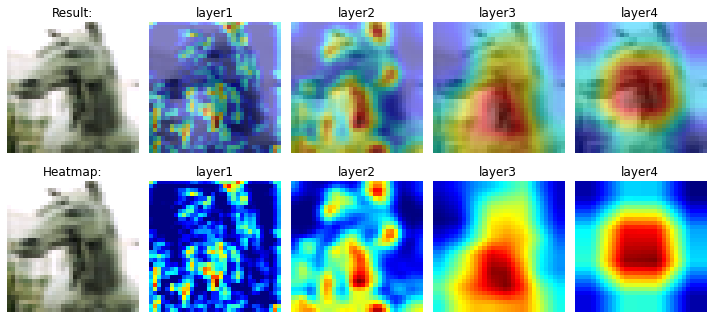

<Figure size 432x288 with 0 Axes>

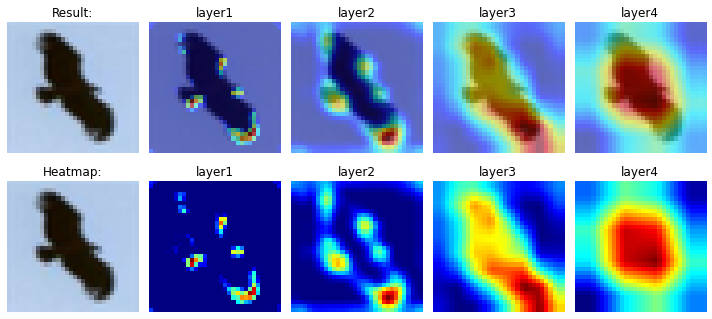

<Figure size 432x288 with 0 Axes>

In [12]:

import random
import torch
from torch import nn
import torch.nn as nn
from torch.nn import functional as F
from torchvision.utils import save_image
from torchvision.models import densenet121, resnet18, resnet152, resnet101
from torchvision.transforms import functional as tf
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from gradcam import gradcam as gd
from gradcam import gradcam_pp as gd_pp
from gradcam import visualize as vs 

gcam_object = vs.GradCAMView(
    cifar_model.m_model, ['layer1', 'layer2', 'layer3', 'layer4'],
    device, cifar.mean(), cifar.std()
)
print('incorrect samples collected for gradcam=',len(cifar_model.m_incorrect_samples))
if(len(cifar_model.m_incorrect_samples) > 1):
  images = [x['image'] for x in random.sample(cifar_model.m_incorrect_samples, 30)]
  gcam_object(images, 'grad_cam')

